# Imports

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

# Data Loading

In [65]:
train_data = pd.read_csv('./data/train.tsv', sep = '\t')

In [66]:
test_data = pd.read_csv('./data/test.tsv', sep = '\t')

In [67]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [68]:
train_data.tail()

,PhraseId,SentenceId,Phrase,Sentiment
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2
156059,156060,8544,chortles,2


In [69]:
test_data.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine effort .
1,156062,8545,An intermittently pleasing but mostly routine effort
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


# Natural Language Processing - EDA

## Class Balance

In [71]:
train_data['Sentiment'].value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

## Create a new column called `phrase_length` that contains the length of each phrasing:

In [72]:
for i in range(len(train_data)):
    train_data.loc[i,'Phrase_Length'] = len(train_data.iloc[i,2])

## Create a new column called `phrase_word_count` that contains the number of words in each phrase:

In [ ]:
for i in range(len(train_data)):
    train_data.loc[i,'status_word_count'] = len(re.findall(r'\w+', train_data.iloc[i,1]))

In [76]:
train_data

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_Length,Phrase_Word_Count
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,188.0,35.0
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,77.0,14.0
2,3,1,A series,2,8.0,2.0
3,4,1,A,2,1.0,1.0
4,5,1,series,2,6.0,1.0
...,...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,9.0,2.0
156056,156057,8544,forced avuncular chortles,1,25.0,3.0
156057,156058,8544,avuncular chortles,3,18.0,2.0
156058,156059,8544,avuncular,2,9.0,1.0


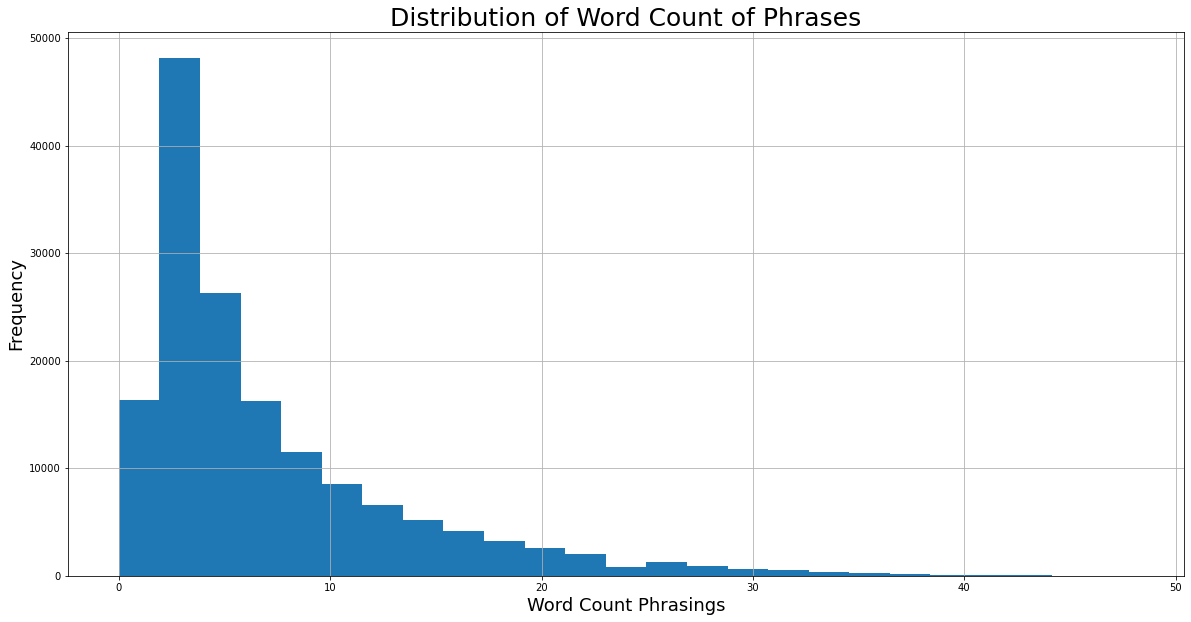

In [77]:
plt.figure(figsize=(20,10))
train_data['Phrase_Word_Count'].hist(bins=25)
plt.title('Distribution of Word Count of Phrases', fontsize=25)
plt.xlabel('Word Count Phrasings', fontsize=18)
plt.ylabel('Frequency', fontsize=18);

## Place Holder Subtext

In [45]:
len(train_data['SentenceId'].unique())

8529

In [53]:
phrased_per_sentence = train_data.groupby('SentenceId')[['Phrase']].count()

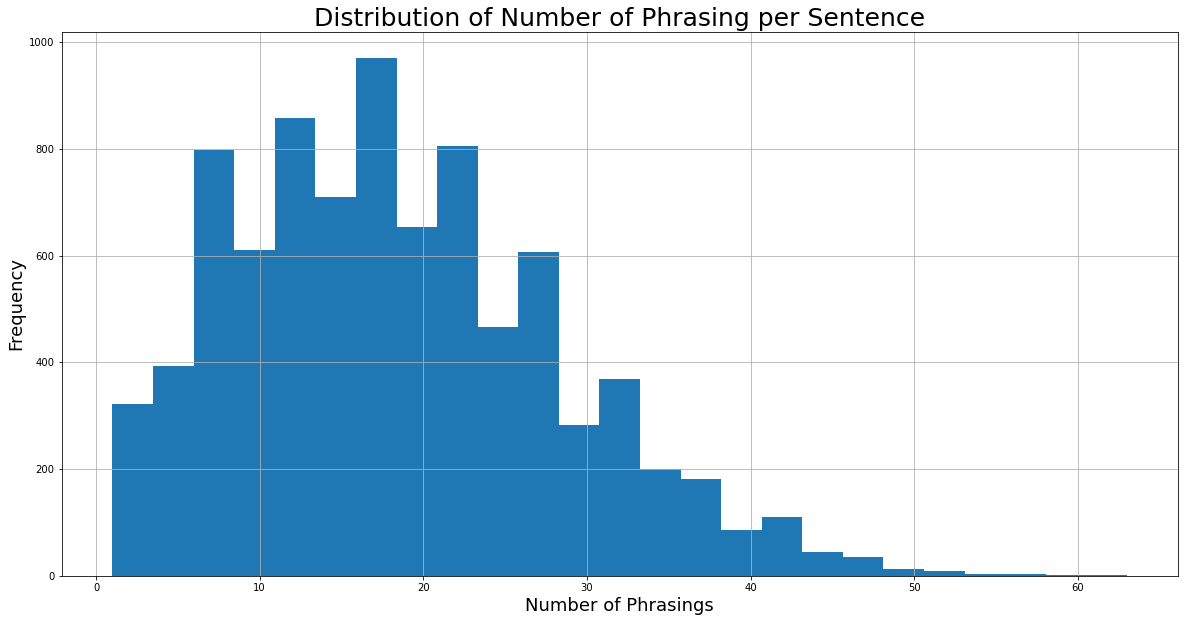

In [59]:
plt.figure(figsize=(20,10))
phrased_per_sentence['Phrase'].hist(bins=25)
plt.title('Distribution of Number of Phrasing per Sentence', fontsize=25)
plt.xlabel('Number of Phrasings', fontsize=18)
plt.ylabel('Frequency', fontsize=18);